Sumber dataset : https://archive.ics.uci.edu/dataset/222/bank+marketing

In [ ]:
# Import Library
import numpy as np
import pandas as pd

In [ ]:
# Memasang google drive ke google colab
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# **READ DAN MELIHAT DATASET SECARA SINGKAT**

In [ ]:
# loading dataset
# Separator yang digunakan adalah semicolon(;) sesuai dengan file csv
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/bank-full.csv',sep=';')

data2=data

# getting a glimpse of the data
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
# Menggunakan fungs value_counts() untuk menampilkan jumlah label kelas dari kolom target
data['y'].value_counts()

,count
y,
no,39922
yes,5289


Karena jumlah kelas no hampir 8 kali lebih banyak dari kelas yes maka pada dataset terdapat class imbalance dan dapat diatasi dengan teknik SMOTE.

# **PREPROCESSING DATA**

In [ ]:
# isnull() method can be used to check each cell in the dataset
data.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


fungsi isnull() akan menampilkan nilai True jika terdapat data yang missing/null dan False jika tidak. namun karena datanya yang banyak jadi tidak mungkin untuk mengecek setiap baris dan cell sehingga akan dilihat summary dari isnull() pada kode dibawah.

In [ ]:
# Finding total standard missing values for each feature
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Kedua kode diatas (isnull() dan isnull().sum()) digunakan untuk menemukan standard missing value menggunakan pandas. namun untuk menemukan non-standard missing value perlu didefinisikan secara manual. Seperti pada dataset ini yang terdapat nilai 'unknown'.

In [ ]:
# Mendefinisikan missing value dalam list
missing_values = ["unknown"]

# Membaca kembali file csv dengan missing value yang telah didefinisikan
new_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/bank-full.csv',sep=';', na_values = missing_values)

print(new_data.isnull().sum())

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


Berdasarkan output diatas, terdapat 4 kolom fitur yang memiliki missing value atau nilai 'unknown'. Namun, pada model MLP ini nilai tersebut tidak akan dihapus karena mungkin berisi informasi.

## **Handling Outliers**

Outliers hanya dicek pada kolom fitur yang berisi nilai numerik. Outliers adalah data yang nilainya berbeda sangat jauh dari nilai-nilai lainnya.


1.   Mengecek Outliers pada kolom **age**



Age Shape: (45211, 17)


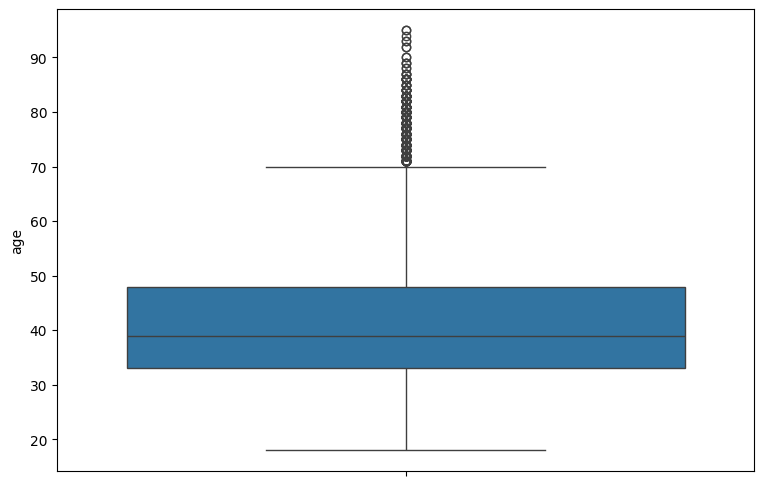

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for age feature
print("Age Shape:",data.shape)
## Max and Min Quantile
max_val = data.age.quantile(0.75)
min_val = data.age.quantile(0.25)

sns.boxplot(data['age'])
plt.show()

Pada kolom fitur **age**, tidak terdapat outliers yang terlalu signifikan, namun terdapat beberapa titik data yang berada di luar boxplot. Pada model ini data tersebut tidak akan dihilangkan karena dapat membawa informasi.

2.   Mengecek Outliers pada kolom **balance**


Balance Shape: (45211, 17)


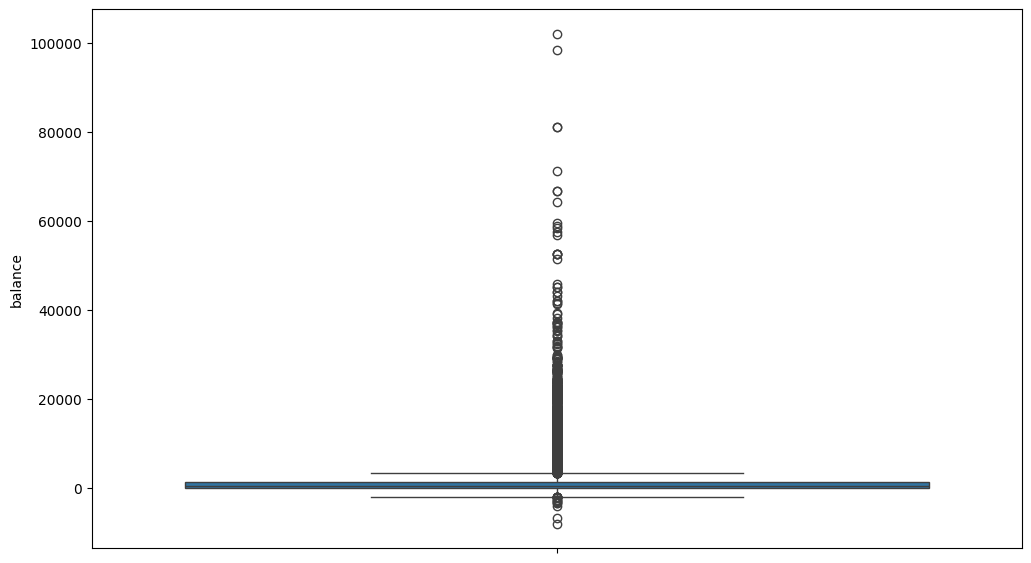

72.0


In [ ]:
fig, axes = plt.subplots(figsize=(12, 7))

# Checking the box plot for balance feature
print("Balance Shape:",data.shape)
## Max and Min Quantile
max_val = data.balance.quantile(0.75)
min_val = data.balance.quantile(0.25)

sns.boxplot(data['balance'])
plt.show()
print(min_val)

Pada visualisasi boxplot fitur **balance** diatas , sama seperti fitur age terdapat banyak titik data yang berada di luar boxplot, dapat dilihat rentang dimana nilai titik data tersebut menyeber lebih luas. Oleh karena itu, akan dihapus secara manual wilayah yang merupakan outliers yaitu nilai **balance** < -6000 dan **balance** > 50000.

After Balance Shape: (45191, 17)


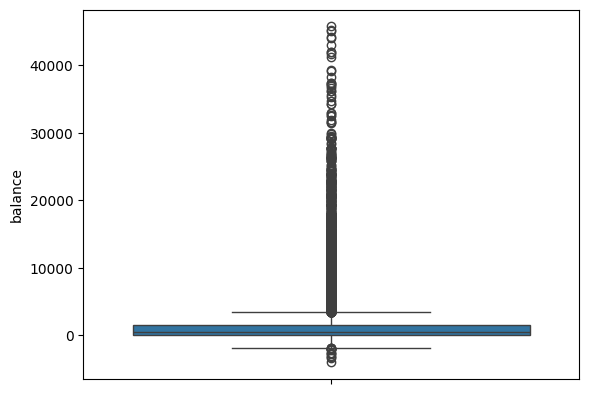

In [ ]:
# removing datapoints that have balance values greater than 50000 and less than -6000
data = data[(data['balance']>-6000) & (data['balance']<50000)]

print("After Balance Shape:",data.shape)

sns.boxplot(data['balance'])
plt.show()

3.  mengecak outliers fitur **day**







Day Shape: (45191, 17)


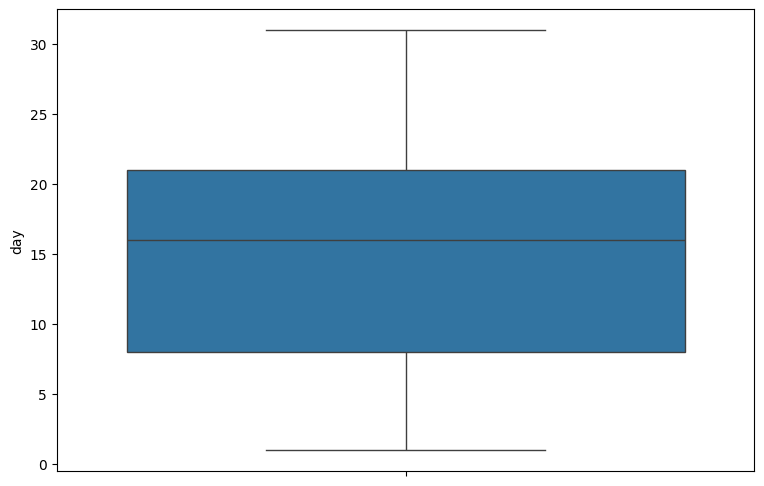

In [ ]:
fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for day feature
print("Day Shape:",data.shape)
## Max and Min Quantile
max_val = data.balance.quantile(0.75)
min_val = data.balance.quantile(0.25)

sns.boxplot(data['day'])
plt.show()


Tidak terdapat outliers pada fitur **day**.

4.  Mengecek outliers untuk fitur **duration**.

Duration Shape: (45191, 17)


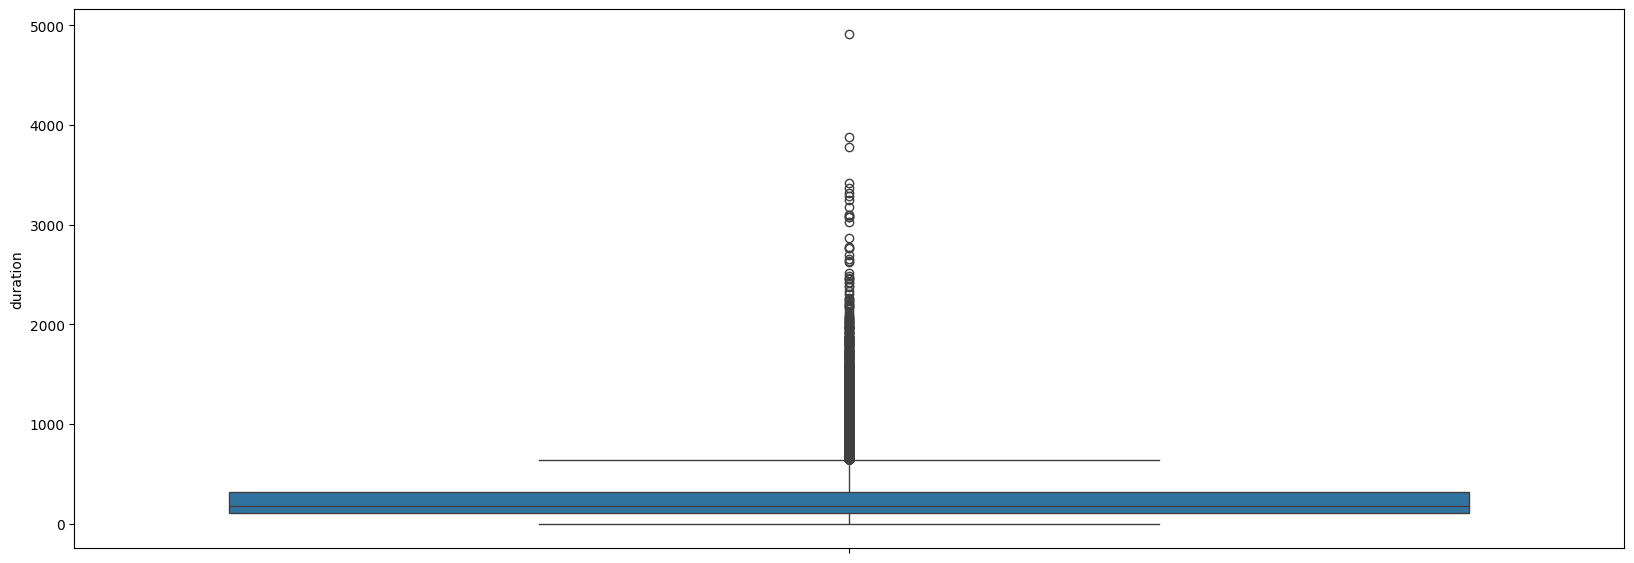

In [ ]:
fig, axes = plt.subplots(figsize=(20, 7))

# Checking the box plot for duration feature
print("Duration Shape:",data.shape)
## Max and Min Quantile
max_val = data.balance.quantile(0.75)
min_val = data.balance.quantile(0.25)

sns.boxplot(data['duration'])
plt.show()

Seperti yang terlihat pada boxplot diatas, terdapat jarak yang signifikan pada titik data mulai di nilai **duration** 2600. Oleh karena itu titik data yang melebihi 2600 akan dianggap sebagai outliers dan dihilangkan pada fitur ini.

After Duration Shape: (45169, 17)


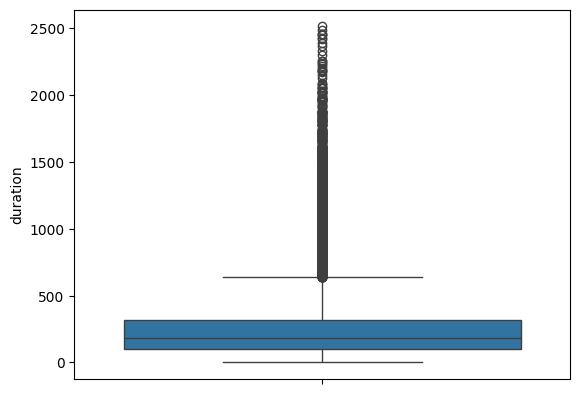

In [ ]:
# removing datapoints that have duration values greater than 2600
data = data[(data['duration']<2600)]

print("After Duration Shape:",data.shape)

sns.boxplot(data['duration'])
plt.show()

Dapat dilihat setelah menghilangkan outlier sebelumnya, jumlah data pada dataset berkurang menjadi 45169.

5.  Mengecek outliers pada fitur **campaign**.

Campaign Shape: (45169, 17)


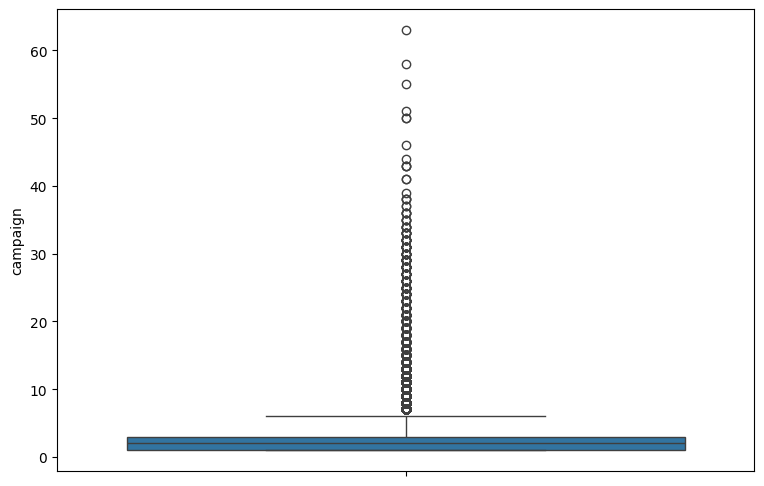

In [ ]:
fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for campaign feature
print("Campaign Shape:",data.shape)
## Max and Min Quantile
max_val = data.campaign.quantile(0.75)
min_val = data.campaign.quantile(0.25)

sns.boxplot(data['campaign'])
plt.show()

Seperti yang terlihat pada boxplot diatas, terdapat jarak yang signifikan pada titik data mulai di sekitar nilai **campaign** 40. Oleh karena itu nilai campaign yang melebihi 40 akan dianggap sebagai outliers dan dihilangkan pada fitur ini.

After Campaign Shape: (45156, 17)


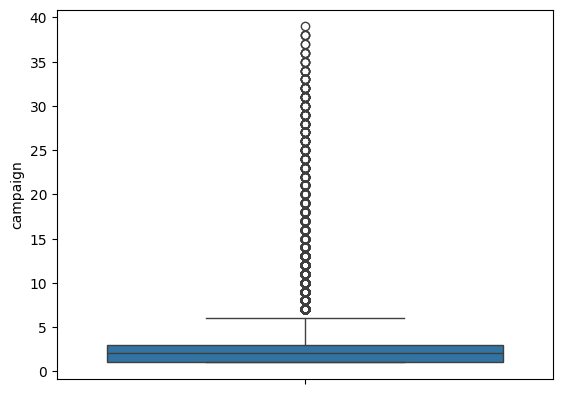

In [ ]:
# removing datapoints that have campaign values greater than 2600
data = data[(data['campaign']<40)]

print("After Campaign Shape:",data.shape)

sns.boxplot(data['campaign'])
plt.show()

6.  Mengecek outliers pada fitur **pdays**

pdays Shape: (45156, 17)


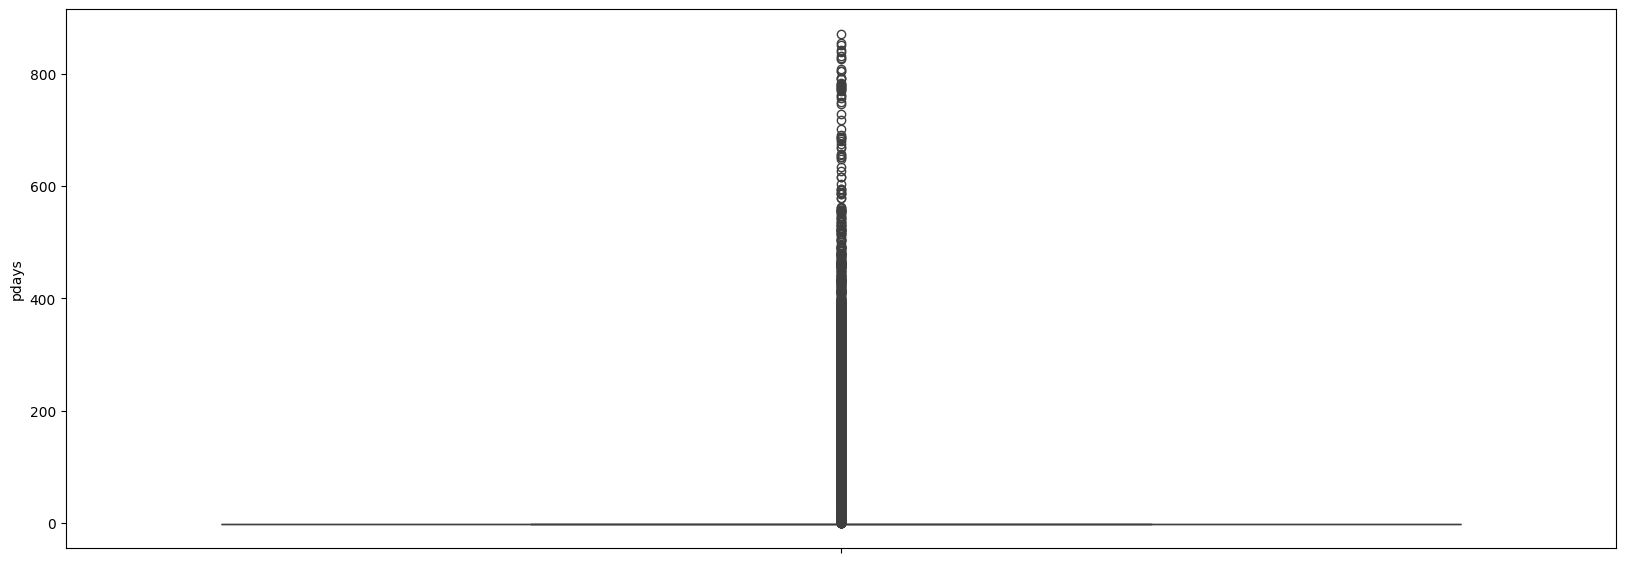

In [ ]:
fig, axes = plt.subplots(figsize=(20, 7))

# Checking the box plot for pdays feature
print("pdays Shape:",data.shape)
## Max and Min Quantile
max_val = data.pdays.quantile(0.75)
min_val = data.pdays.quantile(0.25)

sns.boxplot(data['pdays'])
plt.show()

Dapat dilihat bahwa nilai-nilai tersebut mulai melebar dari titik sekitar nilai **pdays** 580. Oleh karena itu akan dihapus outlier yaitu nilai setelah **pdays** = 575

After pdays Shape: (45095, 17)


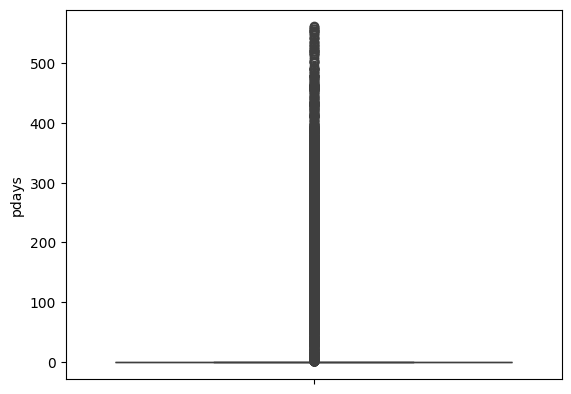

In [ ]:
# removing datapoints that have pdays values greater than 575
data = data[(data['pdays']<575)]

print("After pdays Shape:",data.shape)

sns.boxplot(data['pdays'])
plt.show()

7.  Mengecek outliers pada fitur **previous**.

previous Shape: (45095, 17)


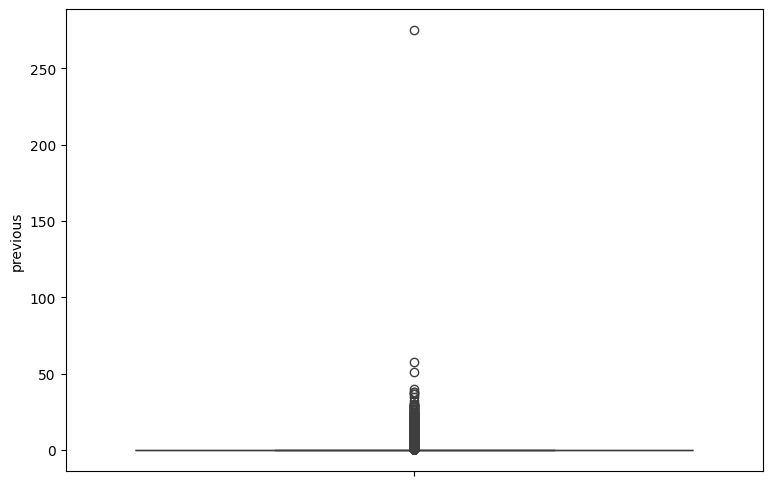

In [ ]:
fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for previous feature
print("previous Shape:",data.shape)
## Max and Min Quantile
max_val = data.previous.quantile(0.75)
min_val = data.previous.quantile(0.25)

sns.boxplot(data['previous'])
plt.show()

Dapat dilihat terdapat 3 outliers setelah nilai 50. Oleh karena itu akan dihapus outliers yaitu nilai **previous** setelah **previous** = 50

After previous Shape: (45092, 17)


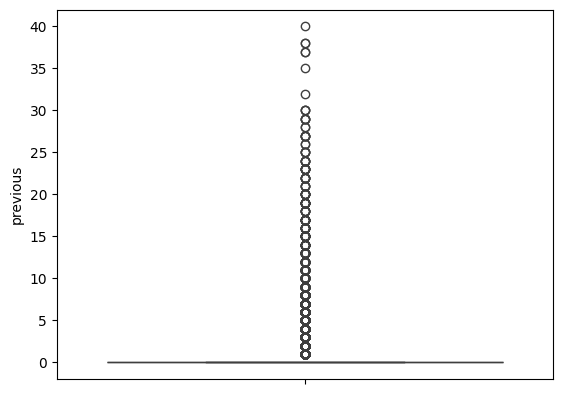

In [ ]:
# removing datapoints that have previous values greater than 50
data = data[(data['previous']<50)]

print("After previous Shape:",data.shape)

sns.boxplot(data['previous'])
plt.show()

Setelah memeriksa dengan cermat semua kolom fitur numerik dalam dataset, telah dihapus outlier dan titik data yang tersisa adalah 45092. Sehingga, telah dihapus 45211 - 45092 = 119 outliers.

## **Feature Encoding**

Pada proses ini data categorical di encode menjadi data numerik. fungsi LabelEncoder() digunakan untuk mengubah nilai class pada target menjadi integer dimana no = 0 dan yes = 1

In [ ]:
from sklearn.preprocessing import LabelEncoder

# encode strings to integer
data['y'] = LabelEncoder().fit_transform(data['y'])
data['y']

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


Ada satu fitur yang dapat dianggap memiliki tipe data Categorical Ordinal; **education**. Ini karena ketika mempertimbangkan nilai yang ada di kolom ini, sebuah urutan dapat dilihat sebagai sekunder, tersier, dll. Fitur ini diubah menjadi representasi numerik menggunakan pemetaan sebagai berikut.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# checking the values in education field
data['education'].value_counts()

education_mapper = {"unknown":-1, "primary":1, "secondary":2, "tertiary":3}
data["education"] = data["education"].replace(education_mapper)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,3,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,2,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,2,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,-1,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,-1,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,3,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,1,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,2,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,2,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


## **Removing Unwanted Features**

Fitur **duration** berisi durasi kontak terakhir, dalam hitungan detik.

Seperti yang dikatakan oleh sumber data, atribut ini sangat mempengaruhi target output (contoh, jika **duration**=0 maka y='no'). Namun, durasinya tidak diketahui sebelum panggilan dilakukan. selain itu, setelah akhir panggilan y jelas diketahui. Dengan demikian, input ini hanya boleh dimasukkan untuk tujuan pembandingan dan harus dibuang jika tujuannya adalah untuk mendapatkan model prediksi yang realistis.

Oleh karena itu, telah diputuskan untuk menghapus fitur **duration** dari dataset yang digunakan untuk prediksi.

In [ ]:
# data.drop(['duration', 'contact','month','day'], inplace=True, axis = 1)
data.drop(['duration'], inplace=True, axis = 1)

# inplace=True means the operation would work on the original object. axis=1 means we are dropping the column, not the row.

data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,3,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,0
1,44,technician,single,2,no,29,yes,no,unknown,5,may,1,-1,0,unknown,0
2,33,entrepreneur,married,2,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,0
3,47,blue-collar,married,-1,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,0
4,33,unknown,single,-1,no,1,no,no,unknown,5,may,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,3,no,825,no,no,cellular,17,nov,3,-1,0,unknown,1
45207,71,retired,divorced,1,no,1729,no,no,cellular,17,nov,2,-1,0,unknown,1
45208,72,retired,married,2,no,5715,no,no,cellular,17,nov,5,184,3,success,1
45209,57,blue-collar,married,2,no,668,no,no,telephone,17,nov,4,-1,0,unknown,0


OneHot encoding digunakan untuk encode fitur categorical seperti 'job', 'marital', 'contact', 'month', 'poutcome' seperti berikut.

In [ ]:
# Using OneHotEncoding pandas.get_dummies

# listing down the features that has categorical data
categorial_features = ['job', 'marital', 'contact', 'month', 'poutcome']
# categorial_features = ['job', 'marital', 'poutcome']
for item in categorial_features:
    # assigning the encoded data into a new DataFrame object
    df = pd.get_dummies(data[item], prefix=item)
    data = data.drop(item, axis=1)
    for categorial_feature in df.columns:
        #Set the new column in data to have corresponding df values
        data[categorial_feature] = df[categorial_feature]

In [ ]:
binary_valued_features = ['default','housing', 'loan']
bin_dict = {'yes':1, 'no':0}

#Replace binary values in data using the provided dictionary
for item in binary_valued_features:
    data.replace({item:bin_dict},inplace=True)

Setelah tahap ini, seluruh nilai pada dataset telah di encode menjadi nilai numerik.

In [ ]:
# rearrange the columns in the dataset to contain the y (target/label) at the end

cols = list(data.columns.values)
cols.pop(cols.index('y')) # pop y out of the list
data = data[cols+['y']] #Create new dataframe with columns in new order

Kode diatas ditulis karena setelah encoding data cetegorical menggunakan OneHotEncoding, kolom baru ditambahkan di akhir kolom dataset dan kolom y (target) tidak terdapat di akhir kolom dataset lagi. Sehingga kode diatas digunakan untuk memindahkan kolom y kembali di akhir dataset.

In [ ]:
# checking the final info about the dataset
data.describe()

,age,education,default,balance,housing,loan,day,campaign,pdays,previous,y
count,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000
mean,40.929899,2.019139,0.018030,1337.164730,0.556041,0.160206,15.807416,2.752905,39.302249,0.567019,0.116406
std,10.614841,0.902716,0.133061,2742.702618,0.496855,0.366801,8.321816,3.000820,97.020071,1.844048,0.320715
min,18.000000,-1.000000,0.000000,-4057.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,2.000000,0.000000,72.000000,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,2.000000,0.000000,448.000000,1.000000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,3.000000,0.000000,1425.000000,1.000000,0.000000,21.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,3.000000,1.000000,45789.000000,1.000000,1.000000,31.000000,39.000000,562.000000,40.000000,1.000000


## **Splitting the Data**

In [ ]:
y = data['y']
X = data.values[:, :-1] # get all columns except the last column

# spliting training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

Disini saat menggunakan fungsi train_test_split(), digunakan nilai awal random_state agar pembagian data dilakukan dengan cara yang sama walaupun kode dijalankan berkali-kali.

## **Feature Scaling**

Setelah encoding data cetegorical, dataset sekarang berisi fitur dengan rentang data yang berbeda-beda. Nilai-nilai tersebut distandarisasi dengan feature scaling. Fitur numerik di scaling dengan menghapus rata-rata dan dengan menskalakan ke satuan variance (StandardScaler) sebagai berikut.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# **Feature Engineering**

Pemilihan Fitur (feature selection) adalah salah satu konsep inti dalam machine learning yang sangat memengaruhi kinerja model. Fitur data yang digunakan untuk melatih model machine learning memiliki pengaruh besar pada performa yang dapat dicapai. Fitur yang tidak relevan atau hanya sebagian relevan dapat berdampak negatif pada performa model.

## **Drawing the Correlation Matrix**

Oleh karena itu akan dilakukan mekanisme pemeriksaan Koefisien Korelasi untuk memeriksa hubungan antara fitur yang berbeda dengan output.

Masing-masing jenis korelasi tersebut dapat ada dalam spektrum yang diwakili oleh nilai dari 0 hingga 1 di mana fitur korelasi yang sedikit atau sangat positif dapat berupa 0,5 atau 0,7. Jika terdapat korelasi positif yang kuat dan sempurna, maka hasilnya direpresentasikan dengan nilai skor korelasi sebesar 0,9 atau 1.

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,1.000000,-0.164160,-0.015227,0.086632,-0.179804,-0.016287,-0.007087,0.005524,-0.026688,0.002297,...,0.052429,0.022825,-0.125761,0.029050,0.061120,0.033475,-0.008377,-0.021871,0.032141,0.002919
1,-0.164160,1.000000,-0.008288,0.046873,-0.021548,0.015159,0.018139,0.001410,0.006897,0.026724,...,-0.068824,0.018169,-0.068977,0.051460,0.010865,0.001384,0.020024,0.008748,0.028548,-0.033866
2,-0.015227,-0.008288,1.000000,-0.071413,-0.004733,0.070133,0.005912,0.016081,-0.027990,-0.020866,...,0.006028,-0.014019,-0.002881,0.009799,-0.017395,-0.012491,-0.023488,-0.015419,-0.023613,0.037753
3,0.086632,0.046873,-0.071413,1.000000,-0.064539,-0.090828,0.009663,-0.016481,0.003927,0.025602,...,0.033259,0.029632,-0.073507,0.124019,0.045353,0.018811,0.016565,0.008178,0.033107,-0.032908
4,-0.179804,-0.021548,-0.004733,-0.064539,1.000000,0.041551,-0.030964,-0.029192,0.133308,0.043427,...,-0.106072,-0.068011,0.426129,0.003226,-0.089980,-0.074278,0.112398,0.037032,-0.087610,-0.068683
5,-0.016287,0.015159,0.070133,-0.090828,0.041551,1.000000,0.010779,0.012088,-0.019148,-0.011602,...,-0.025250,-0.029853,-0.025027,0.015810,-0.030357,-0.031792,0.000931,-0.007114,-0.052044,0.027069
6,-0.007087,0.018139,0.005912,0.009663,-0.030964,0.010779,1.000000,0.167007,-0.094614,-0.061620,...,-0.196811,-0.019449,-0.026958,0.095247,0.028929,-0.053488,-0.069878,-0.033025,-0.028486,0.086364
7,0.005524,0.001410,0.016081,-0.016481,-0.029192,0.012088,0.167007,1.000000,-0.088567,-0.037563,...,0.039771,-0.018677,-0.074723,-0.087845,-0.053320,-0.035423,-0.088182,-0.018895,-0.059563,0.108394
8,-0.026688,0.006897,-0.027990,0.003927,0.133308,-0.019148,-0.094614,-0.088567,1.000000,0.555006,...,-0.117551,0.028234,0.088779,0.013275,0.053665,0.054546,0.715263,0.384932,0.234780,-0.881427
9,0.002297,0.026724,-0.020866,0.025602,0.043427,-0.011602,-0.061620,-0.037563,0.555006,1.000000,...,-0.075735,0.032310,0.004265,0.052001,0.066291,0.071680,0.436729,0.360163,0.252633,-0.652595


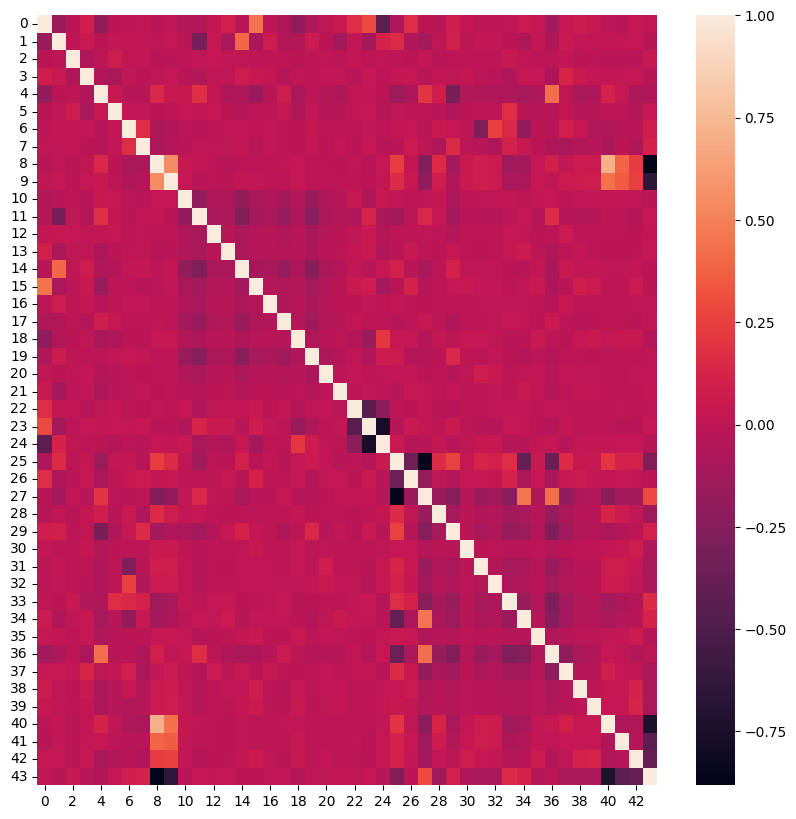

In [ ]:
# draw the correlation matrix
correlation_matrix = pd.DataFrame(X_train).corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(correlation_matrix, ax=ax)
correlation_matrix

Setelah menghasilkan matriks korelasi, dapat dilihat bahwa di sebelah kanan matriks terdapat fitur yang memiliki korelasi sangat tinggi. biasanya fitur yang memiliki korelasi tinggi ini dihapus karena, fitur tersebut bergantung secara linier dengan fitur lain. Fitur-fitur ini berkontribusi sangat sedikit dalam memprediksi output tetapi meningkatkan biaya komputasi.

Jelas bahwa fitur yang berkorelasi berarti mereka membawa informasi yang sama, jadi sangat logis untuk menghapus salah satunya.

Untuk menemukan kolom yang tepat yang memiliki nilai korelasi tinggi, dilakukan kode di bawah ini. Akan diperiksa segitiga atas matriks korelasi karena segitiga atas dan bawah adalah cerminan satu sama lain yang dibagi dengan diagonal dalam matriks korelasi. Di sini diperiksa kolom yang memiliki nilai korelasi lebih dari 0,95 dengan tujuan untuk dapat menghapusnya.

In [ ]:
# getting the upper triangle of the correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
print(upper_tri)

# checking which columns can be dropped
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print('\nTo drop')
print(to_drop)

# removing the selected columns
X_train = X_train.drop(X_train.columns[to_drop], axis=1)
X_test = X_test.drop(X_test.columns[to_drop], axis=1)
print(X_train.head())

    0        1         2         3         4         5         6         7   \
0  NaN -0.16416 -0.015227  0.086632 -0.179804 -0.016287 -0.007087  0.005524   
1  NaN      NaN -0.008288  0.046873 -0.021548  0.015159  0.018139  0.001410   
2  NaN      NaN       NaN -0.071413 -0.004733  0.070133  0.005912  0.016081   
3  NaN      NaN       NaN       NaN -0.064539 -0.090828  0.009663 -0.016481   
4  NaN      NaN       NaN       NaN       NaN  0.041551 -0.030964 -0.029192   
5  NaN      NaN       NaN       NaN       NaN       NaN  0.010779  0.012088   
6  NaN      NaN       NaN       NaN       NaN       NaN       NaN  0.167007   
7  NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8  NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9  NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
10 NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
11 NaN      NaN       NaN       NaN       NaN       

Namun, setelah menjalankan kode diatas, dapat dilihat tidak ada kolom yang memiliki nilai korelasi lebih dari 0,95 dan oleh karena itu tidak ada kolom yang dihapus.


## **Applying PCA**

Principal Component Analysis, atau PCA, adalah metode dimensionality-reduction yang biasa digunakan untuk mengurangi dimensi dari dataset yang besar, dengan  mengubah sekumpulan besar variabel menjadi variabel yang lebih kecil yang masih berisi sebagian besar informasi dalam kumpulan tersebut.

In [ ]:
from sklearn.decomposition import PCA

# apply the PCA for feature for feature reduction
pca = PCA(n_components=0.95)
pca.fit(X_train)
PCA_X_train = pca.transform(X_train)
PCA_X_test = pca.transform(X_test)

X_train

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,-0.558648,-1.128982,-0.135502,-0.479519,0.893548,-0.436770,-0.097025,-0.250903,2.707694,0.777093,...,-0.365813,-0.102961,1.509537,-0.31054,-0.128011,-0.111835,-0.347442,4.874651,-0.185947,-2.123465
1,1.796571,-0.021201,-0.135502,-0.484989,-1.119134,2.289535,0.263477,0.748835,-0.415406,-0.307489,...,-0.365813,-0.102961,-0.662455,-0.31054,-0.128011,-0.111835,-0.347442,-0.205143,-0.185947,0.470928
2,0.666066,-0.021201,-0.135502,0.085987,-1.119134,-0.436770,-1.298699,-0.584149,-0.415406,-0.307489,...,-0.365813,-0.102961,-0.662455,-0.31054,-0.128011,-0.111835,-0.347442,-0.205143,-0.185947,0.470928
3,-0.841275,-1.128982,-0.135502,-0.491552,0.893548,-0.436770,1.344984,-0.584149,-0.415406,-0.307489,...,-0.365813,-0.102961,1.509537,-0.31054,-0.128011,-0.111835,-0.347442,-0.205143,-0.185947,0.470928
4,-0.181813,-0.021201,-0.135502,-0.001518,0.893548,2.289535,1.585319,-0.250903,2.130487,0.234802,...,-0.365813,-0.102961,-0.662455,-0.31054,-0.128011,-0.111835,2.878180,-0.205143,-0.185947,-2.123465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36068,-0.747066,1.086579,-0.135502,0.232195,-1.119134,-0.436770,-0.217193,-0.250903,1.563588,0.234802,...,-0.365813,-0.102961,-0.662455,-0.31054,-0.128011,-0.111835,2.878180,-0.205143,-0.185947,-2.123465
36069,-0.558648,1.086579,-0.135502,-0.387274,0.893548,-0.436770,1.104649,0.748835,-0.415406,-0.307489,...,-0.365813,-0.102961,-0.662455,-0.31054,-0.128011,-0.111835,-0.347442,-0.205143,-0.185947,0.470928
36070,-1.123901,-3.344543,-0.135502,-0.233045,-1.119134,-0.436770,-0.938197,-0.584149,-0.415406,-0.307489,...,-0.365813,-0.102961,-0.662455,-0.31054,-0.128011,-0.111835,-0.347442,-0.205143,-0.185947,0.470928
36071,-1.312319,-0.021201,-0.135502,-0.358834,0.893548,-0.436770,-0.097025,-0.584149,-0.415406,-0.307489,...,-0.365813,-0.102961,1.509537,-0.31054,-0.128011,-0.111835,-0.347442,-0.205143,-0.185947,0.470928


Di sini, belum diatur n_components model PCA secara manual. Kita ingin varian yang dijelaskan antara 95–99%. Oleh karena itu, ditetapkan n_components PCA ke 0,95.

# **Developing the MultiLayer Perceptron Model**

In [ ]:
from sklearn.neural_network import MLPClassifier

# define and train an MLPClassifier named mlp on the given data
mlp = MLPClassifier(hidden_layer_sizes=(50,200,50), max_iter=300, activation='relu', solver='adam', random_state=1)
mlp.fit(PCA_X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 200, 50), max_iter=300, random_state=1)

In [ ]:
PCA_X_train

array([[-3.17428136,  2.9417411 , -1.10190984, ..., -0.7581117 ,
         0.06754851,  0.08753574],
       [ 0.45357695, -2.77266654, -2.74546928, ...,  0.35935679,
         0.51365627,  0.72655917],
       [ 0.28609767, -1.77098747, -0.85752515, ..., -1.11515942,
         0.22941411,  0.16754282],
       ...,
       [-0.32611861, -0.83789589,  1.5608128 , ...,  0.96349741,
        -1.89423924, -3.23526765],
       [ 0.2452907 ,  0.84814249,  2.59078885, ..., -0.11918013,
         0.39904162,  0.09239883],
       [ 0.34673753, -0.82099457, -0.23221502, ..., -1.23767651,
         0.6650229 ,  0.04314375]])

## **Confusion Matrix**

Menggunakan confusion matrix, dapat dilihat berapa banyak true positives, false positives, false negatives, dan true negatives pada testing model.

Accuracy
0.8471005654728906


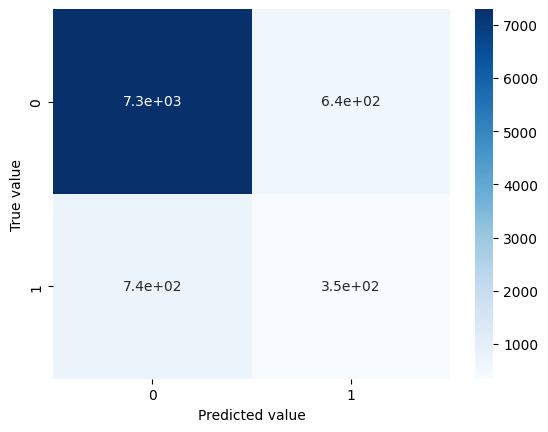

In [ ]:
print('Accuracy')
print(mlp.score(PCA_X_test, y_test))

# draw the confusion matrix
predict = mlp.predict(PCA_X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predict)
fig, ax = plt.subplots(1)
ax = sns.heatmap(confusion_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

Confusion matrix di atas menunjukkan bahwa ada 350 true positive dan 740 false negative, yang masih bagus untuk dataset yang imbalance. Jumlah false positives adalah 640 dan true negatives adalah 7300.

Kita dapat mencari Mean Squared Error (MSE) dan skor lainnya sebagai berikut.

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error

# print the training error and MSE
print("Training error: %f" % mlp.loss_curve_[-1])
print("Training set score: %f" % mlp.score(PCA_X_train, y_train))
print("Test set score: %f" % mlp.score(PCA_X_test, y_test))
print(accuracy_score(y_test, predict))

print("MSE: %f" % mean_squared_error(y_test, predict))

Training error: 0.077759
Training set score: 0.976797
Test set score: 0.847101
0.8471005654728906
MSE: 0.152899
